Based on: https://blog.tensorflow.org/2018/04/fashion-mnist-with-tfkeras.html

In [0]:
!pip install tensorflow-gpu=="1.15"
!pip install numpy
!pip install matplotlib

In [0]:
# Doing imports an
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)


x_train shape: (60000, 28, 28) y_train shape: (60000,)


In [0]:
# Normalizing data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [0]:
# Defining model
model = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
#model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
# Take a look at the model summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 16)        2320      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 256)              

In [0]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
import numpy as np
x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)


In [0]:
# Training
history = model.fit(x_train,
         y_train,
         validation_data = (x_test, y_test),
         batch_size=64,
         epochs=10)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.5913 - acc: 0.7829 - val_loss: 0.4039 - val_acc: 0.8506
Epoch 2/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.4084 - acc: 0.8529 - val_loss: 0.3356 - val_acc: 0.8768
Epoch 3/10
60000/60000 [==============================] - 3s 54us/sample - loss: 0.3580 - acc: 0.8696 - val_loss: 0.3147 - val_acc: 0.8838
Epoch 4/10
60000/60000 [==============================] - 3s 54us/sample - loss: 0.3284 - acc: 0.8803 - val_loss: 0.2876 - val_acc: 0.8937
Epoch 5/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.3086 - acc: 0.8863 - val_loss: 0.2718 - val_acc: 0.9010
Epoch 6/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.2922 - acc: 0.8921 - val_loss: 0.2738 - val_acc: 0.8977
Epoch 7/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.2796 - acc: 0.8971 - val_loss: 0.

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)

In [0]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


In [0]:
history.history['acc']

[0.78288335,
 0.8529,
 0.8695667,
 0.88035,
 0.88631666,
 0.89215,
 0.89715,
 0.8996,
 0.90291667,
 0.90603334]

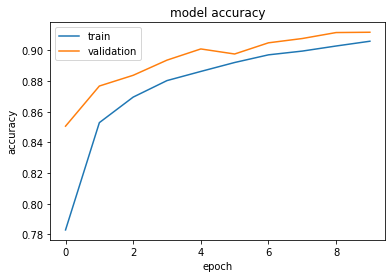

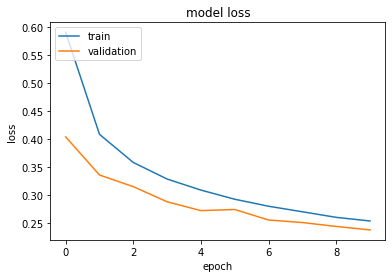

In [0]:
# Ploting code from https://stackoverflow.com/questions/41908379/keras-plot-training-validation-and-test-set-accuracy user Simone
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [0]:
# Outputing test score
score

[0.23722082098126412, 0.9119]

In [0]:
# Outputing scores on rotated dataset
rotated_test1 = np.rot90(x_test, 1, (1,2))
rotated_test2 = np.rot90(x_test, 2, (1,2))
rotated_test3 = np.rot90(x_test, 3, (1,2))
print(model.evaluate(rotated_test1, y_test, verbose=0))
print(model.evaluate(rotated_test2, y_test, verbose=0))
print(model.evaluate(rotated_test3, y_test, verbose=0))

[9.019701774597168, 0.0652]
[4.7853444427490235, 0.2295]
[9.913410375976563, 0.0624]


In [0]:
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
del model  # deletes the existing model

# returns a compiled model
# identical to the previous one

model = tf.keras.models.load_model('my_model.h5')

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)
print(score)

[0.23722082098126412, 0.9119]
